# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Grouping and Summarizing Data

Previously we were able to merge two DataFrames. Another type of wrangling we would want to do is to group rows of data and perform operations on the group. This is done using groupby statements. 


## The Superstore dataset

Previously we have merged the Orders and Products tables to create a new dataset called orders_by_product.csv.

This is the dataset that we will read in, let's call it `merged` as we did previously.

### Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read in the dataset


In [ ]:
# read in the orders dataset
merged = pd.read_csv('datasets/orders_by_product.csv')

In [ ]:
# Check the first 5 rows
merged.head()

In [ ]:
# Check the columns
merged.columns

Great! Now we can analyse the data by **splitting** the data by `category`, `sub_category`, `year`, `month` and even the `order_day`.


## Split-Apply-Combine

---

What if we want summary statistics _with respect to some categorical variable?_ To tackle this problem, we'll use the **Split-Apply-Combine** technique. 

* **Split**: Separate your data into different DataFrames, one for each category.
* **Apply**: On each split-up DataFrame, apply some function or transformation (for example, the mean).
* **Combine**: Take the results and combine the split-up DataFrames back into one aggregate DataFrame.

This might sound complicated, but it's actually only two commands in `pandas` (the **Combine** step is done for us).

- First, we use the `groupby()` statements to segment our data to a specific subsets.
- Then, we apply the function that we want to use.

The result will be the list of groups that we have specified, with the calculated value for each group. 


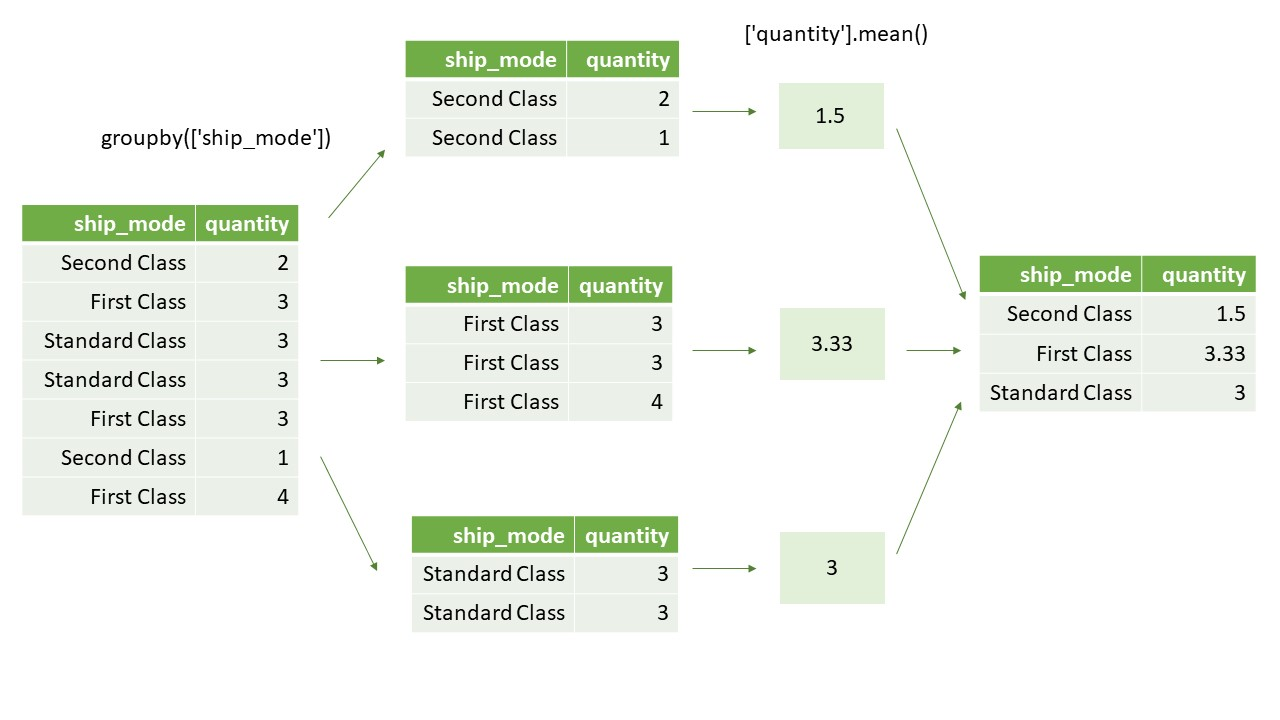



Let's try it out!

In [ ]:
# If we just want to count the number of rows in the 'order_id' row
merged['order_id'].count()

Let's group by `ship_mode`, and get a count of orders for each ship mode.

In [ ]:
# Counting AFTER we group by ship mode
merged.groupby('ship_mode')['order_id'].count()

In [ ]:
# Is this similar to value_counts()? What's the difference?
merged['ship_mode'].value_counts()

We can see that the value_counts() is also counting by groups, and sorts by the highest value, but groupby() sorts the results in alphabetical order of the groups by default. 

However, using groupby, we can get *other* aggregated values by category, such as the *max*, *min*, *mean*, etc.


Let's find out the highest sales amount for each ship mode:

In [ ]:
# find the max sales by ship mode, return as a Series
merged.groupby('ship_mode')['sales'].max()

In [ ]:
# find the mean values for all other columns in the DataFrame by ship mode
merged.groupby('ship_mode').mean()

#### Quick Exercise

Find the sum of profit for each ship_mode for all orders.

In [ ]:
# return a series
merged.groupby('ship_mode')['profit'].sum()

#### Multiple Aggregations On the Same Column

We can also use the `.agg()` method with multiple arguments, to simulate a `.describe()` method like we used before:

In [ ]:
merged.groupby('ship_mode')['sales'].agg(['count','mean','min','max'])

In [ ]:
merged.describe()

#### Multi-level Groupby

We can also do multi-level groupbys. 



In [ ]:
# Let's have a look at the different categories orders fall under
merged.head()

This is referred to as a `Multiindex` dataframe. Here, we can see the following fields in a nested group by, with a count of order_ids effectively giving us a count of the number of orders for every unique ship_mode and category combination:

- Ship Mode - Second Class, First Class, Standard Class, Same Day
- Category - Furniture, Office Supplies, Technology

In [ ]:
# Return the result as a Series
merged.groupby(['category','ship_mode'])['order_id'].count()


In [ ]:
# Unstack the columns so that one becomes a row header
merged.groupby(['category','ship_mode'])['order_id'].count().unstack()

As you can see, groupby() is useful for us to obtain aggregate functions that help us to compare the data across categories. We will do more exercises in the homework below for you to practice.



### Plotting with Pandas

Pandas can create some simple plots to visualize the grouped data.


In [ ]:
# Remember we found the total profit for each ship mode

# Let's save the results
plotdata = merged.groupby('ship_mode')['profit'].sum()
print(plotdata)
# then just plot it


In [ ]:
# Default is line plot
#plotdata.plot()
# Try bar plot
plotdata.plot(kind='bar')

# Try other kinds: barh, pie

In [ ]:
merged.groupby('ship_mode')['discount'].mean().plot(kind='bar')

In [ ]:
# Try to plot the multi level group:

plotdata=merged.groupby(['ship_mode','category'])['order_id'].count()
print(plotdata)
# adjust the plot size: what does this show us? will a bar plot be better?
plotdata.plot(kind='bar')

In [ ]:
#unstack then plot
# Try to plot the multi level group:
plotdata=merged.groupby(['ship_mode','category'])['order_id'].count().unstack()
print(plotdata)

plotdata.plot(kind='bar')

## Wrap up

We've covered main data wrangling and cleaning tasks! Here are the key takeaways:

- **Missing data** comes in many shapes and sizes. Before deciding how to handle it, we identify it exists. We then derive how the missingness is affecting our dataset, and make a determination about how to fill in values.

```python
# pro tip for identifying missing data
df.isnull().sum()
```

- **Merging DataFrames** helps us to join datasets on a key column, similar to SQL joins. 

```
pd.merge(left, right, how='inner', on='indexlabel')
```

- **Groupby** statements are particularly useful for a subsection-of-interest analysis. Specifically, zooming in on one condition, and determining relevant statstics.

```python
# group by 
df.groupby('column').agg['count', 'mean', 'max', 'min']
```

- **Apply functions** help us clean values across an entire DataFrame column. They are *like* a for loop for cleaning, but many times more efficient. They follow a common pattern:
1. Write a function that works on a single value
2. Test that function on a single value
3. Apply that function to a whole column

(The most confusing part of apply functions is that we write them with *a single value* in mind, and then apply them to many single values at once.)

#### Review Exercises / Homework

Let's practice what we have learned in this unit. We want to analyse the returns from the orders.

Q1. Read in the file `returns.csv`, then merge the `merged` DataFrame with the `returns` to determine if there were any returns on each order. Name the new DataFrame `merged_returns`.


In [ ]:
# Q1 Answer 


Q2. How many missing values are there in the `returned` column of `merged_returns`?



In [ ]:
# Q2 Answer


Q3. Check the value_counts() of the `returned` column, with kwarg `dropna=False`.

In [ ]:
# Q3 Answer


Q4. Fill the missing values in the `returned` column of the new `merged_returns` DataFrame with `'No'` 
Once you are satisfied it is correct, you can set `inplace=True`. 
You can run your answer to Q3 again to check the value counts after filling!

In [ ]:
# Q4 Answer



Q5. Now that we have the `returned` column in the `merged_returns` DataFrame, use a groupby() to compare the mean sales for orders which were returned and those which were not.

In [ ]:
# Q5 Answer



Q6. Use a multi-level groupby to compare the orders by `returned`, `category` then `ship_mode`. Return the means for all numeric columns. 

In [ ]:
# Q6 Answer


Q7. Write a function called `discount_level` that receives a value `discount` and returns a string based on the following:
if the discount is 0.0, then return 'None', otherwise if discount is greater than 0.2, return 'High'. Any other value is considered 'Low'.


In [ ]:
#Q7 Answer


Q8. Apply the function `discount_level` to the `discount` column of `merged_returns` to create a new column.

In [ ]:
# Q8 Anwer


Q9. Using `groupby()` and `count()`, visualize the number of orders that were returned and not returned based on the new discount level with a suitable plot. 


In [ ]:
#Q9 answer

Q10. Congratulations! Save the `merged_returns` file as 'returned_orders.csv'.
    

In [ ]:
# Q10 Answer

